<a href="https://colab.research.google.com/github/shubham151/PatternRecognition/blob/main/ShubhamMishra_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EE 240 HW1 Shubham Mishra, SID: 862467767

## HW1.1


(a)

$\mu = \text{Probability of head after flipping a coin,}$
$\text{considering it's a fair coin.}$
$\text{So probability of getting head } P(\text {head}) = \frac{1}{2} = 0.5$
$\text{similarly for tail } P(\text{tail}) = \frac{1}{2} = 0.5$

$\text{Now since it's a fair coin, Probability of } v_1, v_{\text{rand}}, v_{\text{min}} \text{ have the same probability i.e. } 0.5$



(b)


In [110]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:
def flip_coin(n_coins, n_flips):
  n_head = np.random.binomial(n_flips, 0.5, size=n_coins)
  return n_head


In [112]:
print(flip_coin(1000,10)[0])

5


In [113]:
def coin_experiment(n_runs, n_flips, n_coins):
    v1_list = []
    vrand_list = []
    vmin_list = []

    for _ in range(n_runs):
        heads_counts = flip_coin(n_coins, n_flips)

        v1 = heads_counts[0] / n_flips
        vrand = np.random.choice(heads_counts)/ n_flips
        vmin = np.min(heads_counts) / n_flips

        v1_list.append(v1)
        vrand_list.append(vrand)
        vmin_list.append(vmin)

    return v1_list, vrand_list, vmin_list


In [114]:
def plot_histogram(v_list, label):
    plt.figure(figsize=(8, 6))
    plt.hist(v_list, bins=20, alpha=0.5)
    plt.xlabel('Fraction of Heads')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {label}')
    plt.show()

In [115]:
n_runs = 100000
n_flips = 10
n_coins = 1000

In [116]:
v1_list, vrand_list, vmin_list = coin_experiment(n_runs, n_flips, n_coins)

In [117]:
print(v1_list[0:10], vrand_list[0:10])

[0.6, 0.4, 0.4, 0.6, 0.7, 0.6, 0.4, 0.3, 0.2, 0.3] [0.7, 0.5, 0.5, 0.5, 0.4, 0.5, 0.3, 0.3, 0.7, 0.8]


In [118]:
max_frequency = max(max(v1_list), max(vrand_list), max(vmin_list))
print(max_frequency)

1.0


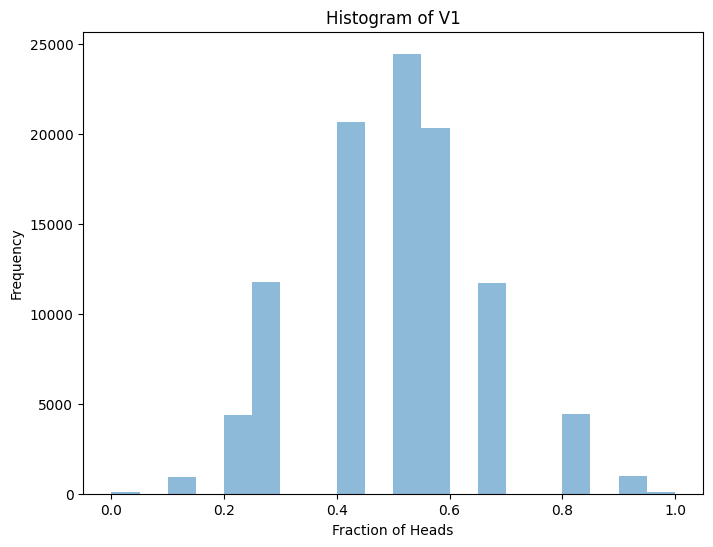

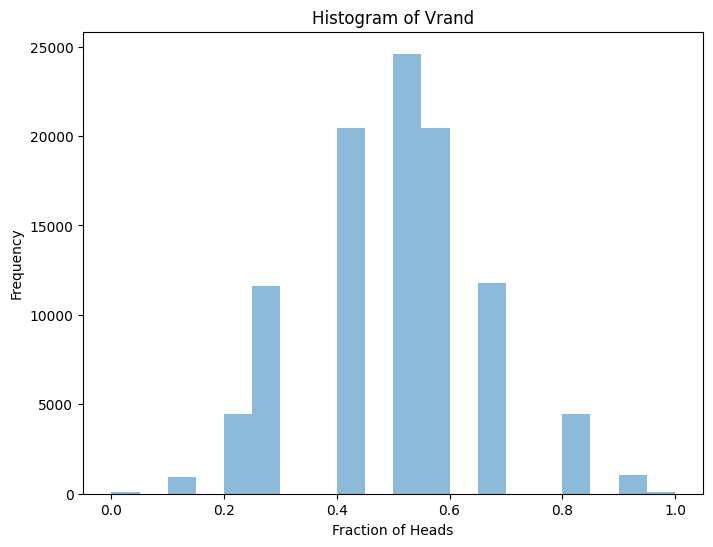

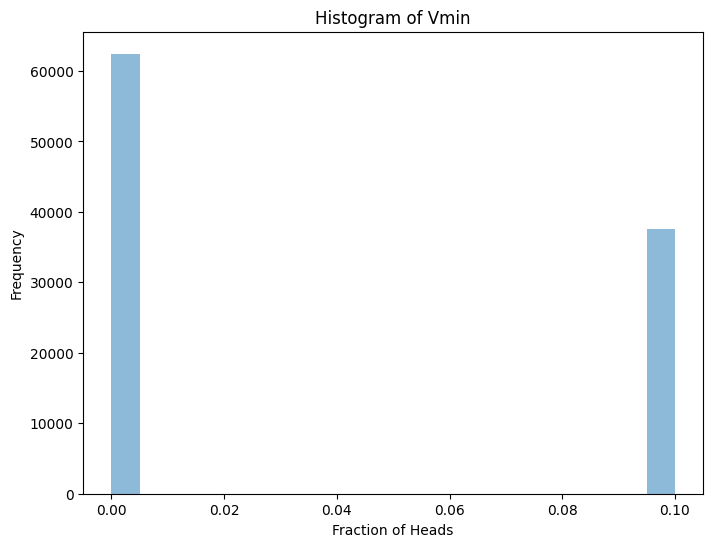

In [119]:
plot_histogram(v1_list, "V1")
plot_histogram(vrand_list, "Vrand")
plot_histogram(vmin_list, "Vmin")

(c)


In [120]:
def hoeffding_bound(epsilon, N=n_flips):
    return 2 * np.exp(-2 * (epsilon**2) * N)

In [121]:
def probability(v, nu, epsilon):
    return (np.abs(v - nu)/n_flips > epsilon).mean()

In [122]:
epsilons = np.linspace(0, 10, 100) / n_flips

In [123]:
v1_err = [probability(np.array(v1_list), 5, e) for e in epsilons]
vrand_err = [probability(np.array(vrand_list), 5, e) for e in epsilons]
v_min_err = [probability(np.array(vmin_list), 5, e) for e in epsilons]

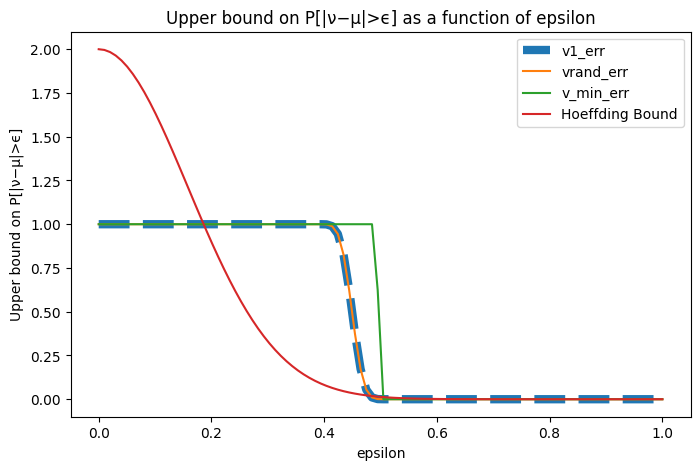

In [124]:
plt.figure(figsize=(8, 5))
plt.plot(epsilons, v1_err, linewidth=6, linestyle="--")
plt.plot(epsilons, vrand_err)
plt.plot(epsilons, v_min_err)
plt.plot(epsilons, np.apply_along_axis(hoeffding_bound, 0, epsilons))
plt.legend([
    "v1_err",
    "vrand_err",
    "v_min_err",
    "Hoeffding Bound"
])
plt.xlabel("epsilon")
plt.ylabel("Upper bound on P[|ν−μ|>ϵ]")
plt.title("Upper bound on P[|ν−μ|>ϵ] as a function of epsilon")
plt.show()

(d)

Looking at the plot, we can see that $\nu_1$ and $\nu_{\text{rand}}$ is following the Hoeffding inequality quite well. This is because $\nu_{\text{min}}$ was specifically picked from a group of 100,000 samples based on the outcomes of those samples i.e. picked after flipping all the coins .


#HW1.2

(a)

Given:

\begin{align*}
& P(A) = \frac{4}{10} = 0.4 \text{ (probability of selecting bin A)} \\
& P(B) = \frac{6}{10} = 0.6 \text{ (probability of selecting bin B)} \\
& P(R, B' \mid A) = 0.3 \times 0.7 = 0.21 \text{ (probability of drawing red and blue balls from bin A)} \\
& P(R, B' \mid B) = 0.7 \times 0.3 = 0.21 \text{ (probability of drawing red and blue balls from bin B)}
\end{align*}


\begin{align*}
P(A \mid R, B') &= \frac{P(R, B' \mid A) \times P(A)}{P(R, B' \mid A) \times P(A) + P(R, B' \mid B) \times P(B)} \\
&= \frac{(0.3 \times 0.7) \times 0.4}{(0.3 \times 0.7) \times 0.4 + (0.7 \times 0.3) \times 0.6} \\
&= \frac{0.21 \times 0.4}{0.21 \times (0.4 + 0.6)} \\
&= \frac{0.21 \times 0.4}{0.21} \\
&= 0.4
\end{align*}

(b)
Given:

\begin{align*}
  & \text{There are 10 bins (4 labeled A and 6 labeled B)} \\
  & \text{Each bin has balls with four colors: red, blue, white, and black} \\
  & \text{The distribution of balls in bin A is (0.1, 0.3, 0.2, 0.4) for (red, blue, white, black)} \\
  & \text{The distribution of balls in bin B is (0.4, 0.2, 0.3, 0.1) for (red, blue, white, black)} \\
  & \text{We randomly select a bin and draw two balls with replacement} \\
  & \text{We want to find } P(A | R, B'), \text{ the probability of selecting bin A given the two drawn balls are red and blue}
\end{align*}

Events:
\begin{align*}
  & A: \text{The selected bin is labeled A} \\
  & B: \text{The selected bin is labeled B} \\
  & R: \text{The first drawn ball is red} \\
  & B': \text{The second drawn ball is blue}
\end{align*}

We want to find \(P(A | R, B')\), which is the probability of selecting bin A given that the drawn balls are red and blue.

Using Bayes' theorem, we can calculate this probability as:

\begin{align*}
P(A \mid R, B') &= \frac{P(R, B' \mid A) \times P(A)}{P(R, B' \mid A) \times P(A) + P(R, B' \mid B) \times P(B)} \\
&= \frac{(0.1 \times 0.3) \times 0.4}{(0.1 \times 0.3) \times 0.4 + (0.4 \times 0.2) \times 0.6} \\
&= \frac{0.03 \times 0.4}{0.03 \times 0.4 + 0.08 \times 0.6} \\
&= \frac{0.012}{0.012 + 0.048} \\
&= \frac{0.012}{0.06} \\
&= 0.2
\end{align*}

Therefore, the probability of selecting bin A, given that the two drawn balls are red and blue, is 0.2 or 20%.


#HW1.3




Given:

N samples ${{(x_n, y_n)}_{n=1}^{N}}$


$$μ_+ = \frac{1}{N_+}∑_{i:y_i = +1}x_i$$

$$μ_- = \frac{1}{N_-}∑_{i:y_i = -1}x_i$$

Distances from the mean are

$$||x-μ_+||_2^2 = ||x||_2^2 + ||μ_+||_2^2 - 2<x,μ_+>$$

$$||x-μ_-||_2^2 = ||x||_2^2 + ||μ_-||_2^2 - 2<x,μ_->$$

Decision rule for "nearest mean"

$y = +1$ if $||x-μ_-||_2^2 > ||x-μ_+||_2^2$

$y = -1$ if $||x-μ_-||_2^2 < ||x-μ_+||_2^2$

Also,

$$||x - μ_-||_2^2 - ||x - μ_+||_2^2 = <w,x> +b$$

$$||x - μ_-||_2^2 - ||x - μ_+||_2^2 = 2<μ_+-μ_-, x> + ||μ_-||_2^2-||\mu_+||_2^2$$

Model Classification:

$y = g(x) = sign[w^Tx + b]$

$w = 2(μ_+-μ_-)$ and $b = ||μ_-||_2^2 - ||μ_+||_2^2$

Therefore,

$$w^Tx+b = ∑_{n=1}^Nα_n<x_n,x>+b$$


#HW1.4

In [125]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

In [126]:
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [127]:
print(mnist.data.shape)
print(mnist.target.shape)
np.unique(mnist.target)

(70000, 784)
(70000,)


array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [128]:
X = mnist.data
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
y = mnist.target.astype(int)
y

array([5, 0, 4, ..., 4, 5, 6])

In [130]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [131]:
def knn_classifier(X_train, y_train, X_test, k):
    y_pred = []
    for x_test in X_test:
        distances = [euclidean_distance(x_train, x_test) for x_train in X_train]
        sorted_indices = np.argsort(distances)
        k_nearest_indices = sorted_indices[:k]
        k_nearest_labels = y_train[k_nearest_indices]
        y_pred.append(np.bincount(k_nearest_labels).argmax())
    return np.array(y_pred)

In [132]:
selected_digits = [1, 2, 7]
mask = np.isin(y, selected_digits)
X_selected = X[mask]
y_selected = y[mask]

(a)

In [133]:
N = 600
train_indices = np.random.choice(len(X_selected), N, replace=False)
X_train = X_selected[train_indices]
y_train = y_selected[train_indices]
test_indices = np.setdiff1d(np.arange(len(X_selected)), train_indices)
X_test = X_selected[test_indices]
y_test = y_selected[test_indices]

In [134]:
y_pred_1nn = knn_classifier(X_train, y_train, X_test, k=1)
accuracy_1nn = np.mean(y_pred_1nn == y_test)
print(f"Accuracy of 1-NN classifier: {accuracy_1nn * 100:.2f}%")

y_pred_3nn = knn_classifier(X_train, y_train, X_test, k=3)
accuracy_3nn = np.mean(y_pred_3nn == y_test)
print(f"Accuracy of 3-NN classifier: {accuracy_3nn * 100:.2f}%")

Accuracy of 1-NN classifier: 96.15%
Accuracy of 3-NN classifier: 95.31%


(b)

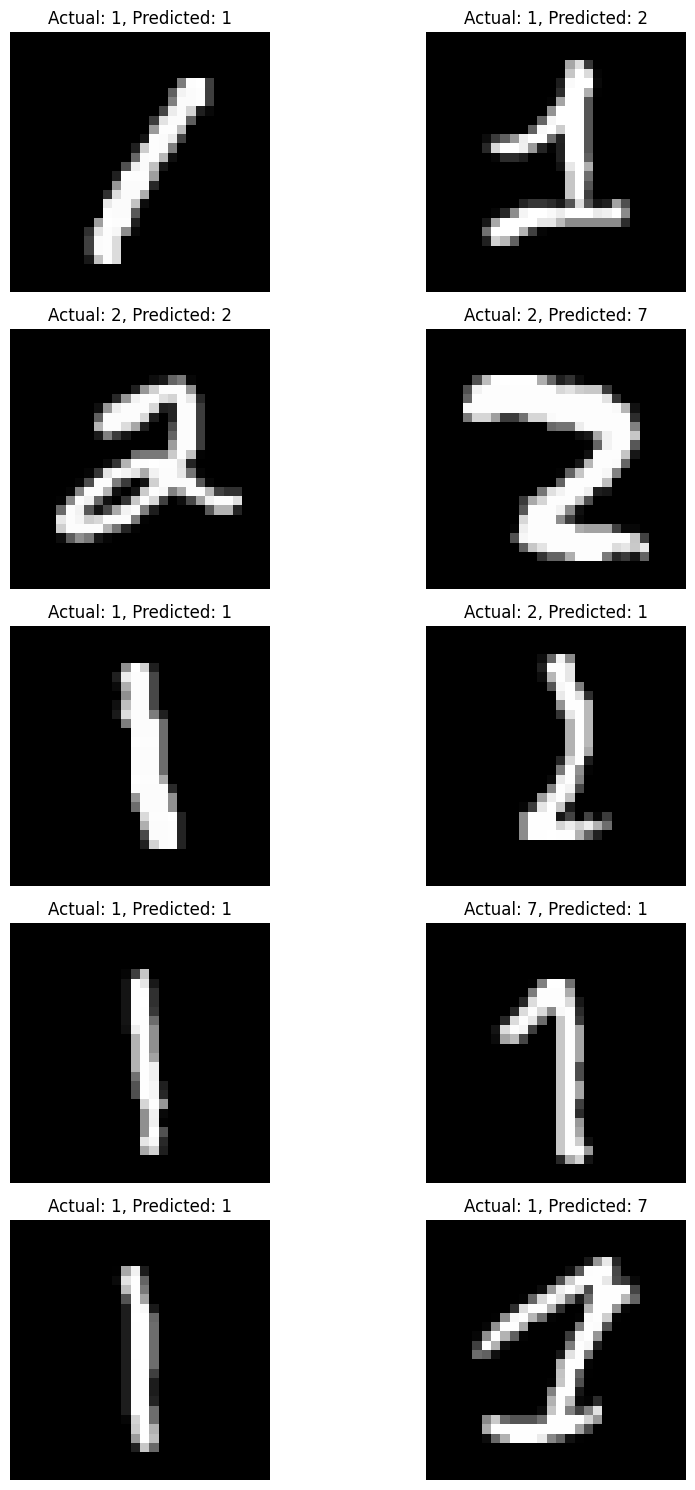

In [135]:
correctly_classified = np.where(y_pred_1nn == y_test)[0][:5]
incorrectly_classified = np.where(y_pred_1nn != y_test)[0][:5]

fig, axs = plt.subplots(5, 2, figsize=(10, 15))

for i, idx in enumerate(correctly_classified):
    digit = X_test[idx].reshape(28, 28)
    axs[i, 0].imshow(digit, cmap='gray')
    axs[i, 0].set_title(f"Actual: {y_test[idx]}, Predicted: {y_pred_1nn[idx]}")
    axs[i, 0].axis('off')

for i, idx in enumerate(incorrectly_classified):
    digit = X_test[idx].reshape(28, 28)
    axs[i, 1].imshow(digit, cmap='gray')
    axs[i, 1].set_title(f"Actual: {y_test[idx]}, Predicted: {y_pred_1nn[idx]}")
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

#HW1.5

In [136]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

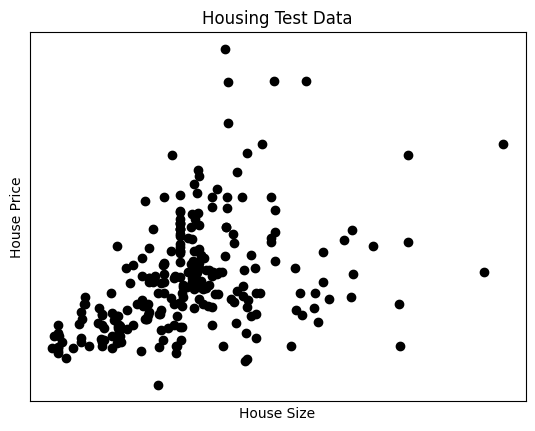

In [137]:
# Importing CSV and defining columns
df = pd.read_csv("Housing.csv")

Y = df['price']
X = df['lotsize']

X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)

# Segmenting the data into training and test subsets
X_train = X[:-250]
X_test = X[-250:]

Y_train = Y[:-250]
Y_test = Y[-250:]

# Visualizing the output
plt.scatter(X_test, Y_test, color='black')
plt.title('Housing Test Data')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.xticks(())
plt.yticks(())

plt.show()

In [138]:
def linear_fit(x_values, y_values):
    w = 0
    b = 0

    x_mean = sum(x_values) / len(x_values)
    y_mean = sum(y_values) / len(y_values)

    num = 0
    den = 0

    for x, y in zip(x_values, y_values):
        x_deviation = x - x_mean
        y_deviation = y - y_mean

        x_deviation_squared = x_deviation ** 2
        den += x_deviation_squared

        product = x_deviation * y_deviation
        num += product

    w = num / den
    b = y_mean - w * x_mean

    return w, b

In [139]:
w, b = linear_fit(X, Y)
print(w, b)


[6.59876759] [34136.19156491]


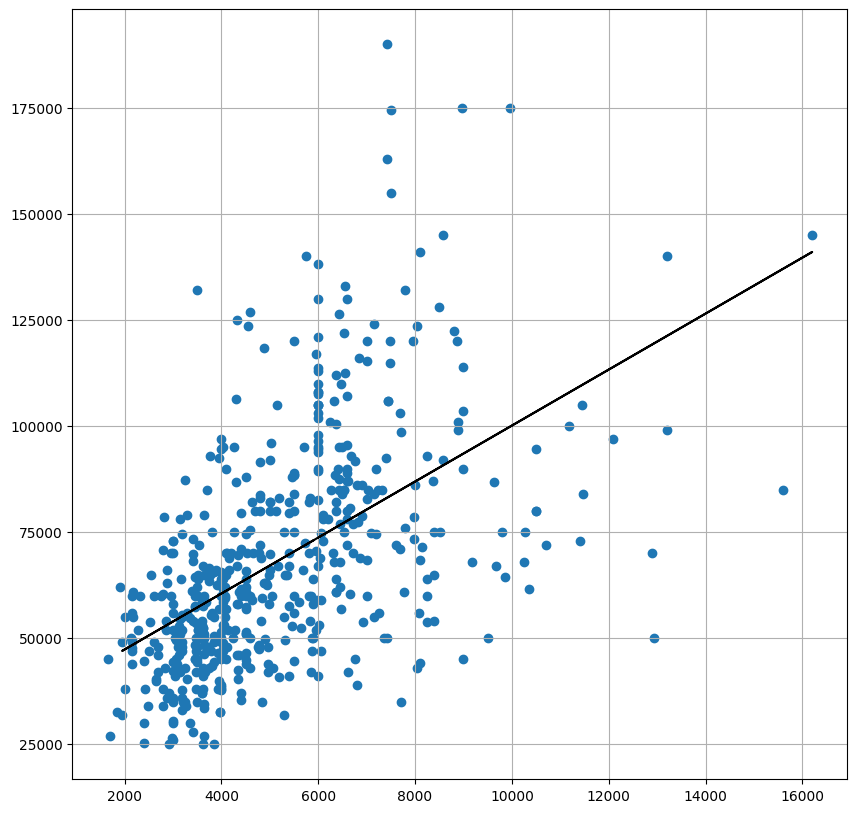

In [140]:
Y_predict = np.dot(X_test, w) + b

X_flat = X.flatten()
xp = [i for i in range(int(np.min(X_flat)), int(np.max(X_flat)) + 3)]
yp = [w * i + b for i in xp]

plt.figure(figsize=(10, 10))
plt.scatter(X, Y)
plt.plot(X_test, Y_predict, color='black')
plt.grid()
plt.show()


(b)

In [141]:
X = df[['lotsize', 'bedrooms', 'bathrms']].values
y = df['price'].values

In [142]:
x_with_ones = np.ones((X.shape[0], 1))
X = np.hstack((X, x_with_ones))

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(546, 4) (546,)
(382, 4) (382,)
(164, 4) (164,)


In [145]:
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [146]:
y2_training = X_train @ w
final_loss = np.mean((y2_training - y_train) ** 2)
print(final_loss)

364646395.2921387


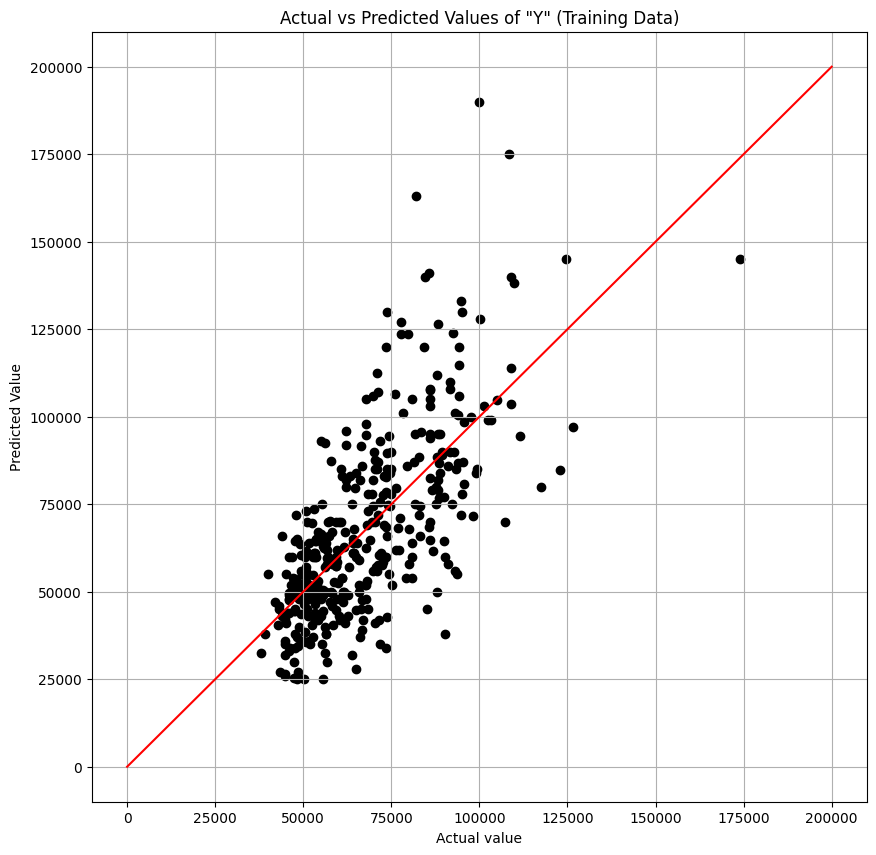

In [147]:
plt.figure(figsize=[10, 10])

plt.scatter(y2_training, y_train, color='black')
plt.plot([0, 200000], [0, 200000], 'r')
plt.xlabel('Actual value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Values of "Y" (Training Data)')
plt.grid()
plt.show()